In [2]:
%autosave 10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Autosaving every 10 seconds


2.0 2.220446049250313e-14


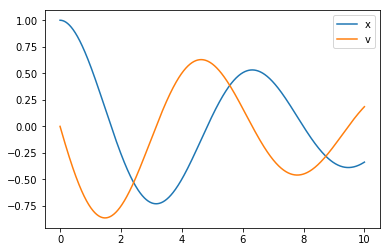

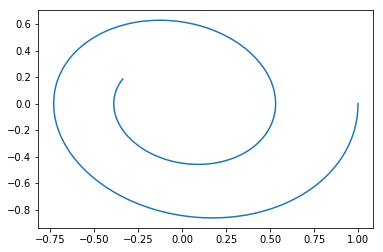

In [31]:
from scipy import integrate
integral, error = integrate.quad(np.sin, 0, np.pi)
print(integral, error)

t_ = np.linspace(0, 10, 1000)
y_ = integrate.odeint(
    lambda y, t: [y[1], -y[0]-0.2*y[1]],
    [1, 0],
    t_,
)
plt.plot(t_, y_[:,0], label='x')
plt.plot(t_, y_[:,1], label='v')
plt.legend()
plt.figure()
plt.plot(y_[:,0], y_[:,1])

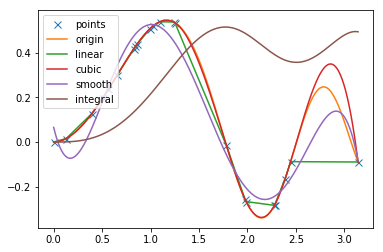

In [60]:
from scipy import interpolate

def f(x):
    return np.exp(-0.5*x) * np.sin(x**2)

x_ = np.sort(np.r_[
    0,
    np.pi,
    np.random.uniform(0, np.pi, 20)
])

y_ = f(x_)
interp_func = interpolate.interp1d(x_, y_, kind='linear')

cubic_spline = interpolate.CubicSpline(x_, y_)
d_cubic_spline = cubic_spline.derivative()
i_cubic_spline = cubic_spline.derivative(-1)

x_long = np.linspace(0, np.pi, 1000)
plt.plot(x_, y_, 'x', ms=7, label='points')
plt.plot(x_long, f(x_long), label='origin')
plt.plot(x_long, interp_func(x_long), label='linear')
plt.plot(x_long, cubic_spline(x_long), label='cubic')
# plt.plot(x_long, d_cubic_spline(x_long), label='derivative')
plt.plot(x_long, i_cubic_spline(x_long), label='integral')
plt.legend()

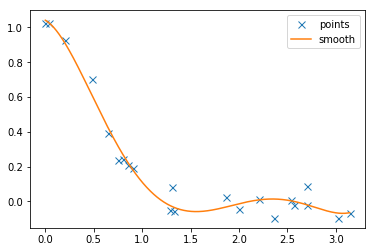

In [62]:
from scipy import interpolate
x_ = np.sort(np.r_[
    0,
    np.pi,
    np.random.uniform(0, np.pi, 20)
])
y_ = (np.exp(-x_**2/0.5)
      + np.random.uniform(-0.1, 0.1, size=x_.shape))
x_long = np.linspace(0, np.pi, 1000)
univar_spline = interpolate.UnivariateSpline(x_, y_, k=5)
plt.plot(x_, y_, 'x', ms=7, label='points')
plt.plot(x_long, univar_spline(x_long), label='smooth')
plt.legend()

    fjac: array([[-1.]])
     fun: array([ -8.88178420e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([  8.93144891e-10])
       r: array([-2.82842925])
  status: 1
 success: True
       x: array([ 1.41421356])
1.417294180664143


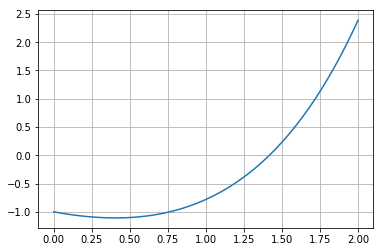

In [83]:
from scipy import optimize
result = optimize.root(
    lambda x: x**2 - 2,
    1.
)
print(result)
result = optimize.brentq(
    lambda x: np.exp(x) - 1.5*x - 2,
    0, 10,
)
print(result)
x = np.r_[0:2:100j]
plt.plot(x, np.exp(x) - 1.5*x - 2)
plt.grid()

      fun: -0.9544665458711115
 hess_inv: array([[ 0.82937944, -0.34123999],
       [-0.34123999,  0.31752228]])
      jac: array([  1.49011612e-08,  -7.45058060e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.08174717,  0.16349432])


<IPython.core.display.Javascript object>


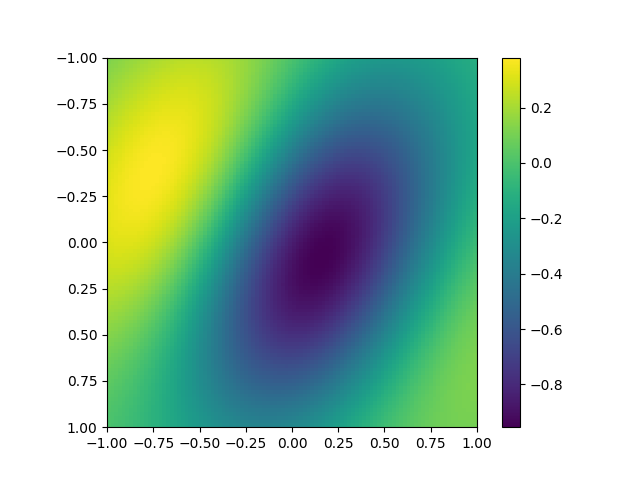

In [3]:
from scipy import optimize

def f(x):
    return (-np.exp(-x[0]**2 - x[1]**2)
            * np.sin((x[0] + 2*x[1] + 1)))

print(optimize.minimize(f, [0,0]))

X, Y = np.mgrid[-1:1:100j,-1:1:100j]
Z = f(grid)
plt.imshow(Z, extent=(-1,1,1,-1))
plt.colorbar()

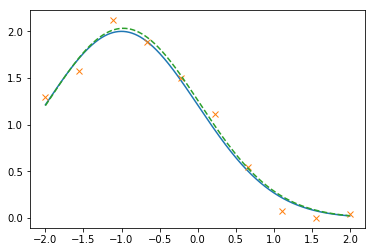

In [13]:
from scipy import optimize
# See lmfit module
def f(x, A, sigma, x0):
    return A * np.exp(-(x-x0)**2/(2*sigma))

x_ = np.linspace(-2, 2, 10)
model_p = (2, 1, -1)
y_ = f(x_, *model_p) + np.random.uniform(-0.2, 0.2, size=x_.shape)
fit_p, _ = optimize.curve_fit(f, x_, y_)
x_long = np.linspace(-2,2,1000)
plt.plot(x_long, f(x_long, *model_p), '-',
         x_, y_, 'x',
         x_long, f(x_long, *fit_p), '--')